In [7]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['figure.figsize'] = 16,8

warnings.filterwarnings('ignore')

In [8]:
pain = pd.read_csv('data/pain.csv').drop(columns='Unnamed: 6')
pain.columns = pain.columns.str.replace(' ', '')
pain['date'] = pd.to_datetime(pain['date'] ,dayfirst=True)#.dt.strftime('%d/%m/%Y')
pain = pain.set_index('date')

In [104]:
sports = pd.read_csv('data/sport.csv')
sports.columns = sports.columns.str.replace(' ', '')
sports['date'] = pd.to_datetime(sports['date'],dayfirst=True)
sports['sport'] = sports['sport'].str.strip()
sports = sports.set_index('date')

## Images

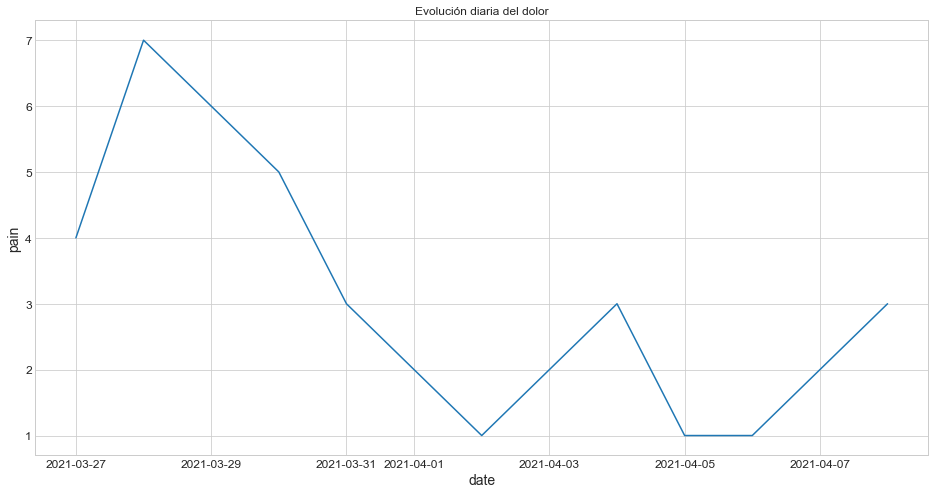

In [106]:
plt.figure()
plt.title('Evolución diaria del dolor')
sns.lineplot(y = pain.pain, x =pain.index )
plt.savefig('images/dolor_diario.png')
plt.show()

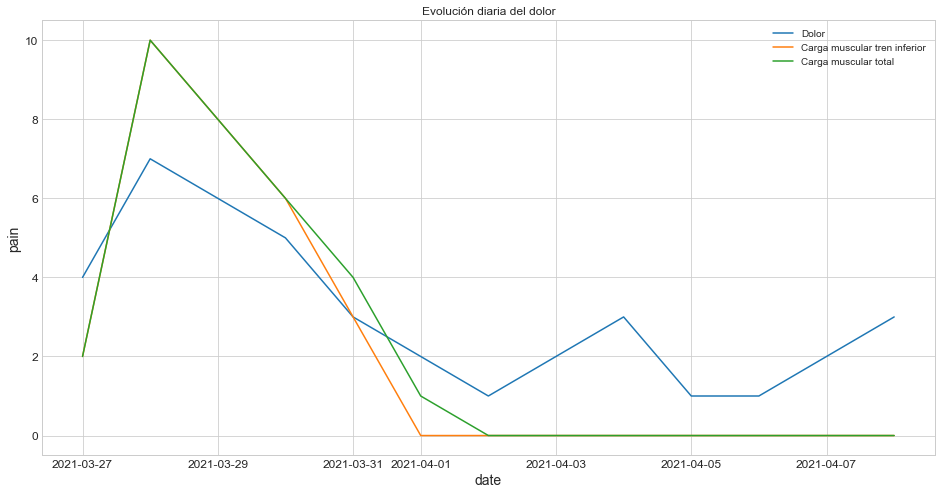

In [107]:
plt.figure()
plt.title('Evolución diaria del dolor y cargas musculares')
sns.lineplot(y = pain.pain, x =pain.index,label = 'Dolor')
sns.lineplot(y = pain.leg_fatigue, x =pain.index,label = 'Carga muscular tren inferior')
sns.lineplot(y = pain.total_fatigue, x =pain.index,label = 'Carga muscular total')
plt.savefig('images/dolor_cargas_diario.png')
plt.show()

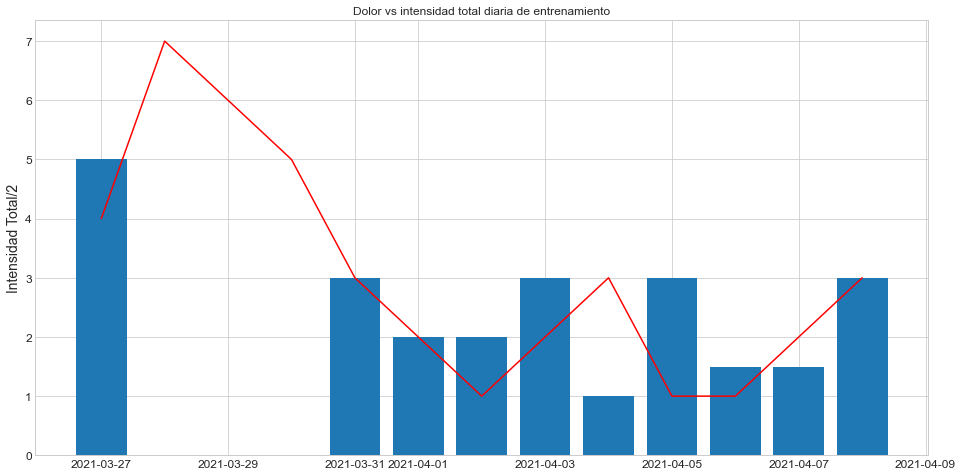

In [108]:
aux = sports.drop(columns="time").groupby(["date"]).agg("sum").reset_index()

aux = pd.merge(pain.reset_index(),aux,on='date')

plt.figure()
plt.title('Dolor vs intensidad total diaria de entrenamiento')
plt.bar(aux.date,aux.total_intensity/2)
plt.ylabel('Intensidad Total/2')
plt.plot(aux.date,aux.pain,c='r')
plt.savefig('images/dolor_int_total.png')
plt.show()

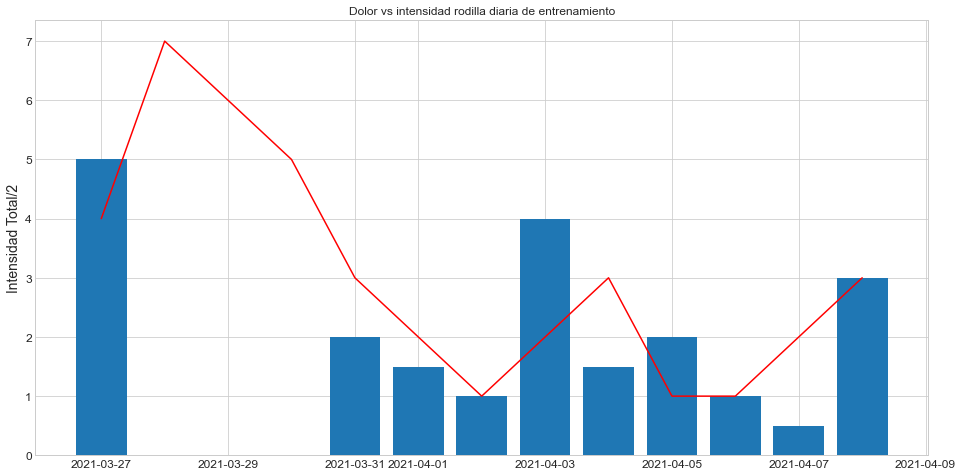

In [109]:
aux = sports.drop(columns="time").groupby(["date"]).agg("sum").reset_index()

aux = pd.merge(pain.reset_index(),aux,on='date')

plt.figure()
plt.title('Dolor vs intensidad rodilla diaria de entrenamiento')
plt.bar(aux.date,aux.knee_intensity/2)
plt.ylabel('Intensidad Total/2')
plt.plot(aux.date,aux.pain,c='r')
plt.savefig('images/dolor_int_rodilla.png')
plt.show()

In [110]:
sports

,sport,total_intensity,knee_intensity,time
date,,,,
2021-03-27,CF,10,10,60
2021-03-28,None,0,0,0
2021-03-29,None,0,0,0
2021-03-30,None,0,0,0
2021-03-31,Yoga,4,3,60
2021-03-31,Swim,2,1,60
2021-04-01,Kite,4,3,90
2021-04-02,Yoga,2,1,30
2021-04-02,Swim,2,1,30


In [122]:
aux = sports.groupby(["date",'sport']).agg("sum").reset_index()
aux = pd.merge(pain.reset_index(),aux,on='date')

In [128]:
aux2 = pd.merge(aux[aux['sport'] =='Kite'],pain,on='date',how='right').fillna(0)
aux3 = pd.merge(aux[aux['sport'] =='CF'],pain,on='date',how='right').fillna(0)

<BarContainer object of 13 artists>

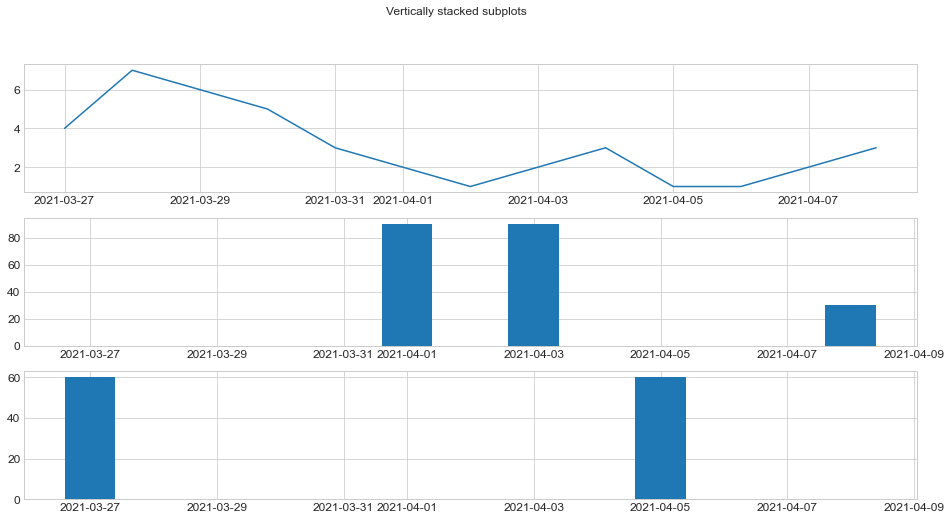

In [129]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
ax1.plot(aux.date,aux.pain)
ax2.bar(aux2.date,aux2.time)
ax3.bar(aux3.date,aux3.time)
